In [77]:
from sklearn import model_selection, datasets, ensemble, tree
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
digits_frame = datasets.load_digits()
train_data, train_label, test_data, test_label = model_selection.train_test_split(digits_frame.data, digits_frame.target, test_size = 0.3)

In [44]:
digits = DataFrame(digits_frame.data)
digits.columns = digits_frame.feature_names

In [45]:
digits["target"] = digits_frame.target

In [46]:
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [47]:
digits.shape

(1797, 65)

In [48]:
digits.columns

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7', 'target'],
      dtype='object')

In [57]:
default_classifier = tree.DecisionTreeClassifier()

In [58]:
print(model_selection.cross_val_score(default_classifier, digits_frame.data, digits_frame.target, cv=10).mean())

0.8302576039726878


In [59]:
bagging_classifier_1 = ensemble.BaggingClassifier(n_estimators=100)

In [60]:
print(model_selection.cross_val_score(bagging_classifier_1, digits_frame.data, digits_frame.target, cv=10).mean())

0.9265083798882682


In [74]:
import math
bagging_classifier_2 = ensemble.BaggingClassifier(n_estimators=100)
print(model_selection.cross_val_score(bagging_classifier_2, digits_frame.data, digits_frame.target, cv=10).mean())

0.9315549348230914


In [75]:
default_classifier_2 = tree.DecisionTreeClassifier(max_features= int(digits_frame.data.shape[1] ** 0.5))
bagging_classifier_3 = ensemble.BaggingClassifier(base_estimator=default_classifier_2, n_estimators=100)
print(model_selection.cross_val_score(bagging_classifier_3, digits_frame.data, digits_frame.target, cv=10).mean())

0.9487988826815641


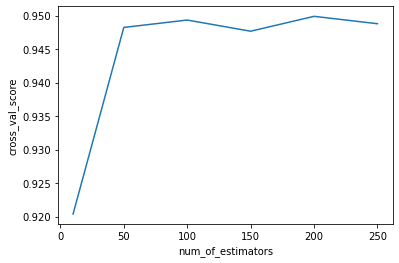

In [85]:
plt.xlabel("num_of_estimators")
plt.ylabel("cross_val_score")
nums = np.array([10, 50, 100, 150, 200, 250])
scores = []
for n in nums:
    random_forest_classifier = ensemble.RandomForestClassifier(n_estimators=n)
    scores.append(model_selection.cross_val_score(random_forest_classifier, digits_frame.data, digits_frame.target, cv=10).mean())           
plt.plot(nums, scores)                                                         

In [80]:
print(model_selection.cross_val_score(random_forest_classifier, digits_frame.data, digits_frame.target, cv=10).mean())

0.9549130974549968


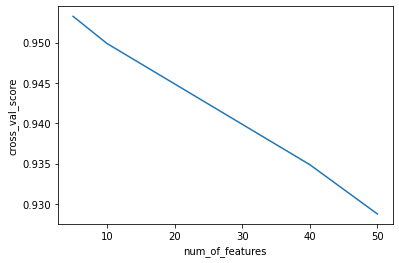

In [86]:
plt.xlabel("num_of_features")
plt.ylabel("cross_val_score")
nums = np.array([5, 10, 40, 50])
scores = []
for n in nums:
    random_forest_classifier = ensemble.RandomForestClassifier(max_features=n)
    scores.append(model_selection.cross_val_score(random_forest_classifier, digits_frame.data, digits_frame.target, cv=10).mean())           
plt.plot(nums, scores) 

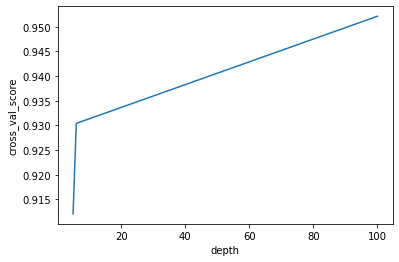

In [88]:
plt.xlabel("depth")
plt.ylabel("cross_val_score")
nums = np.array([5, 6, 100])
scores = []
for n in nums:
    random_forest_classifier = ensemble.RandomForestClassifier(max_depth=n)
    scores.append(model_selection.cross_val_score(random_forest_classifier, digits_frame.data, digits_frame.target, cv=10).mean())           
plt.plot(nums, scores) 